<a href="https://colab.research.google.com/github/SARA3SAEED/ML-Mu/blob/main/s06a_supervised_regression_model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning | Regression (Model Selection & Evaluation)

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


==========

## Model Selection & Evaluation

### Model Selection

In [ ]:
from IPython.display import Image
Image("imgs/ml_map.png")

Choosing the Right Estimator: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Importing Dataset

In [5]:
real_estate = pd.read_csv('/content/drive/MyDrive/ML-Mu/s06-supervised-regression/datasets/real_estate.csv')
real_estate

,price,area
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


In [6]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   area    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [7]:
real_estate.describe().round(2)

,price,area
count,100.00,100.00
mean,292289.47,853.02
std,77051.73,297.94
min,154282.13,479.75
25%,234280.15,643.33
50%,280590.72,696.40
75%,335723.70,1029.32
max,500681.13,1842.51


### Splitting Data

In [8]:
X = real_estate['area']
y = real_estate['price']

### Exploring Data

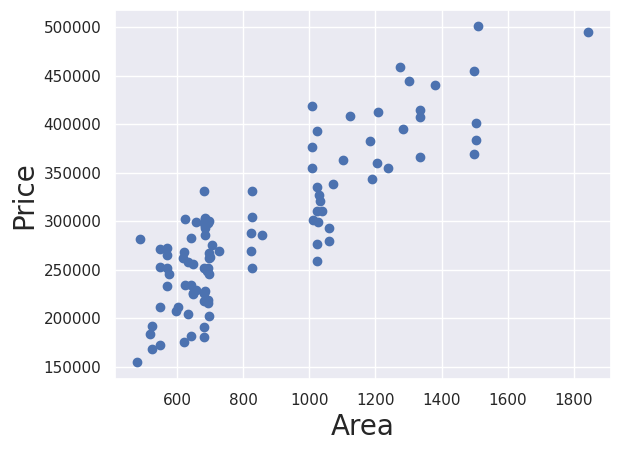

In [9]:
plt.scatter(X,y)
plt.xlabel('Area',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

<Axes: xlabel='area', ylabel='price'>

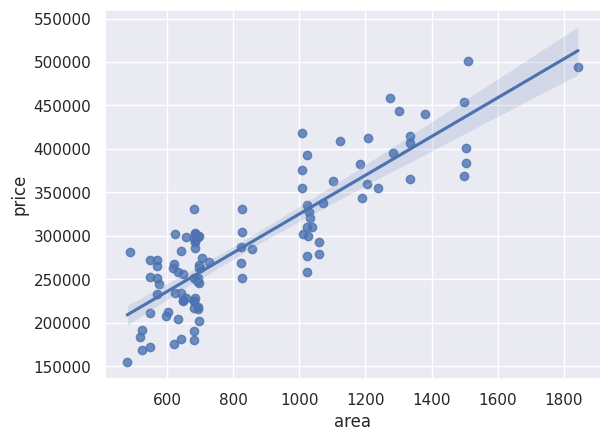

In [10]:
sns.regplot(data=real_estate, x=X, y=y)

### Model Building & Training

### 1] Using Statsmodels (Statistical Approach)

Statsmodels API Modules: https://www.statsmodels.org/dev/api.html#statsmodels-api

Statsmodels OLS: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

In [11]:
import statsmodels.api as sm

In [12]:
X_stat = sm.add_constant(X)

In [13]:
reg_stat = sm.OLS(y,X_stat).fit()

In [14]:
reg_stat.params

const    101912.601801
area        223.178743
dtype: float64

In [15]:
# price = 223.178743 * area + 101912.601801

### 2] Using Scikit-Learn (Machine Learning Approach)

Scikit-Learn Linear Models Modules: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Scikit-Learn LinearRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
X_ml = X.values.reshape(-1,1)

In [18]:
reg_ml = LinearRegression().fit(X_ml,y)

In [19]:
reg_ml.coef_

array([223.17874259])

In [20]:
reg_ml.intercept_

101912.60180122897

In [21]:
# price = 223.178743 * area + 101912.601801

### Model Prediction & Evaluation

Linear Regression Calculator: https://www.statskingdom.com/linear-regression-calculator.html

### 1] Using Statsmodel (Statistical Approach)

##### Evaluating Results

In [22]:
reg_stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           8.13e-31
Time:                        01:35:35   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
area         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

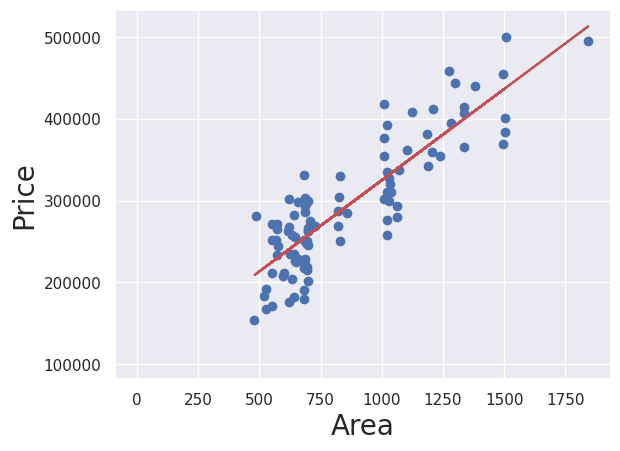

In [23]:
plt.scatter(X,y)
y_hat = 223.178743 * X_stat + 101912.601801
fig = plt.plot(X_stat,y_hat, c='r')
plt.xlabel('Area', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

### 2] Using Scikit-Learn (Machine Learning Approach)

##### Predicting Values

In [24]:
reg_ml.predict([[750]])

array([269296.65874718])

##### Splitting Data

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##### Model Re-Building

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
reg = LinearRegression()

In [29]:
reg.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [30]:
y_pred = reg.predict(X_test.values.reshape(-1,1))

##### Evaluating Results

Scikit-learn Regression Metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Regression Metrics Demo: https://www.geogebra.org/m/yybenxjm

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE):
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE):
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE):
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

All of these are **loss functions**, because we want to minimize them.

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
# MAE
print(mean_absolute_error(y_test,y_pred))

34906.06535517389


In [33]:
# MSE
print(mean_squared_error(y_test,y_pred))

1600387882.902427


In [34]:
# RMSE
print(np.sqrt(mean_squared_error(y_test,y_pred)))

40004.84824246215


In [35]:
np.mean(y_test)

302457.0627878788

In [36]:
np.mean(y_pred)

308590.321891221

In [37]:
# R^2
reg_ml.score(X_train.values.reshape(-1,1),y_train)

0.681032175624396

In [38]:
reg_ml.score(X_test.values.reshape(-1,1),y_test)

0.8159391878528438

In [39]:
r2_score(y_pred,y_test)

0.6555280632578427

==========

# THANK YOU!